In [1]:
%matplotlib inline
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
def cvart(p,array):
        # на вход sort list
        l = len(array)*p
        if(int(l) != l):
            return array[int(l)]
        else:
            return array[int(l) - 1]

In [3]:
def getSortArray(func,size,mu = 0):
    if(func == st.poisson):
        array = func.rvs(size=size,mu=mu)
    else:
        array = func.rvs(size = size)
    array.sort()
    return array


In [4]:
def Plot(func,size,title,mu=0):
    
    
    
    # figure settings
    plt.dpi = 1000
    plt.figure(figsize =(14, 10))
    fig, ax = plt.subplots()
    fig.set_figwidth(15)
    fig.set_figheight(9)
    
    x = []
    for sz in size:
        x.append(np.array(getSortArray(func,sz,mu)))
            
    # Creating plot
    plt.title(title)
    ax.boxplot(x,vert=0,labels = size)
    ax.grid()
    ax.set_xlabel("x")
    ax.set_ylabel("n")
    plt.show()
    

<Figure size 1008x720 with 0 Axes>

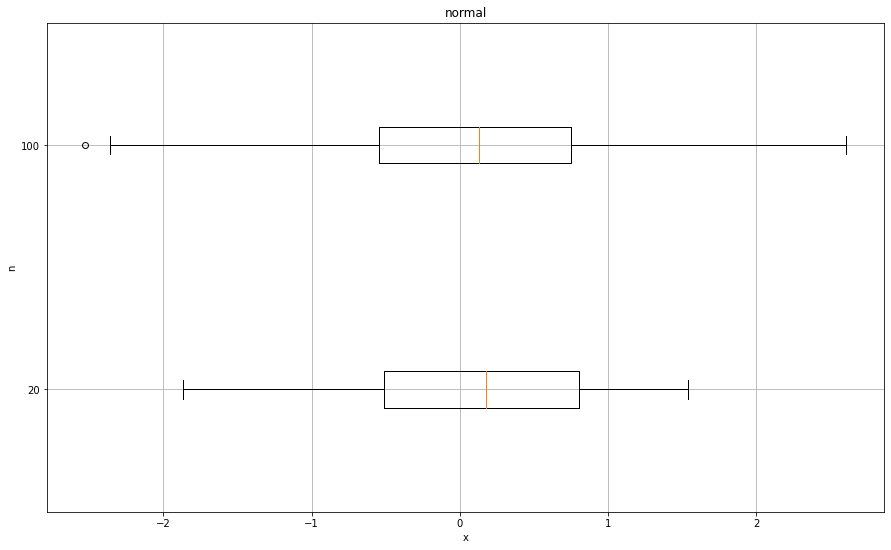

In [5]:
# Нормальное распределение
Plot(st.norm,[20,100],"normal")

<Figure size 1008x720 with 0 Axes>

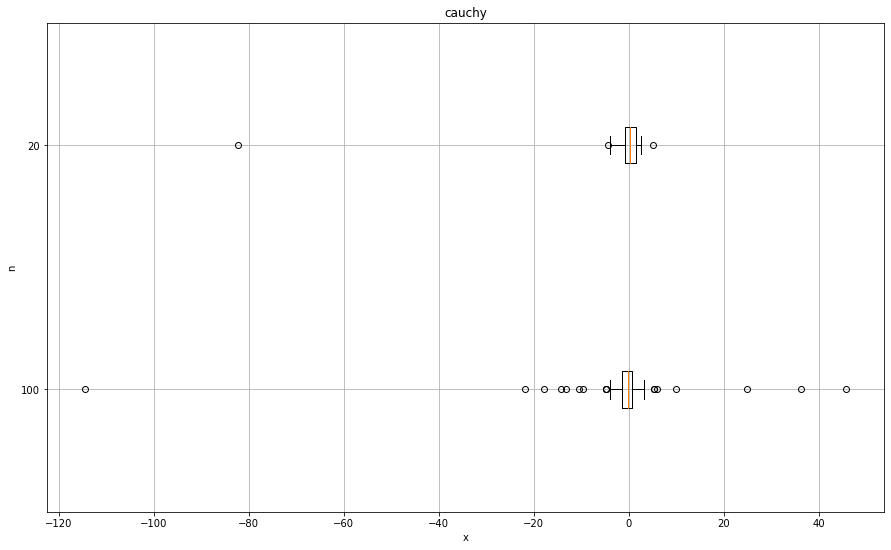

In [6]:
# Распределение Коши
Plot(st.cauchy,[100,20],"cauchy")

<Figure size 1008x720 with 0 Axes>

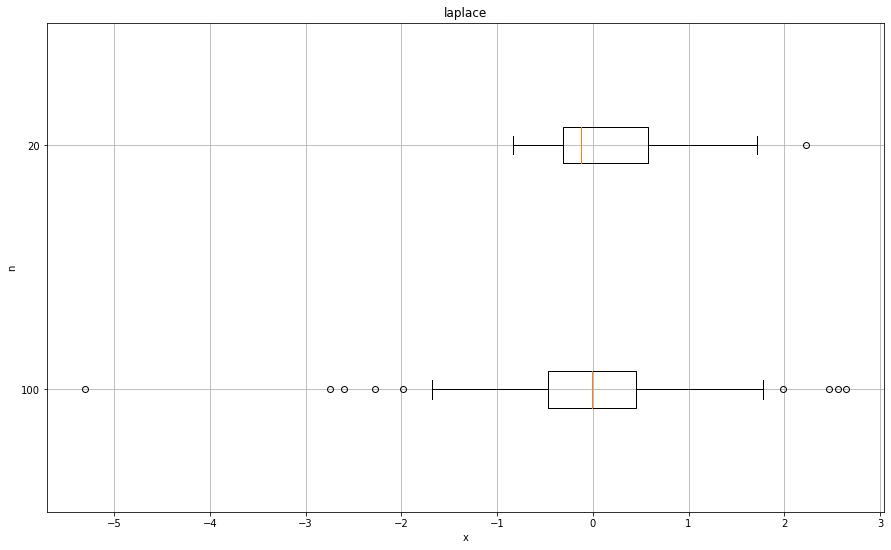

In [7]:
# распределение Лапласа
Plot(st.laplace,[100,20],"laplace")

<Figure size 1008x720 with 0 Axes>

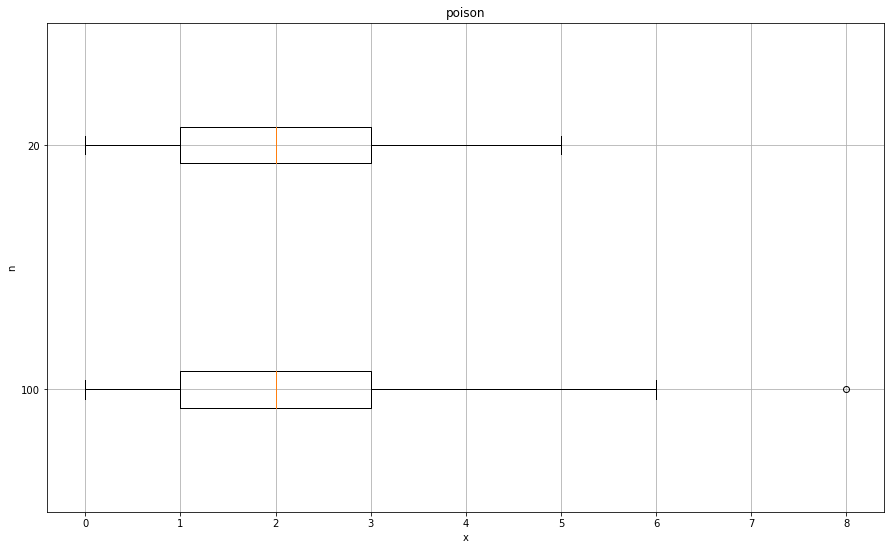

In [8]:
# Распределение Пуассона
Plot(st.poisson,[100,20],"poison",mu = 2)

<Figure size 1008x720 with 0 Axes>

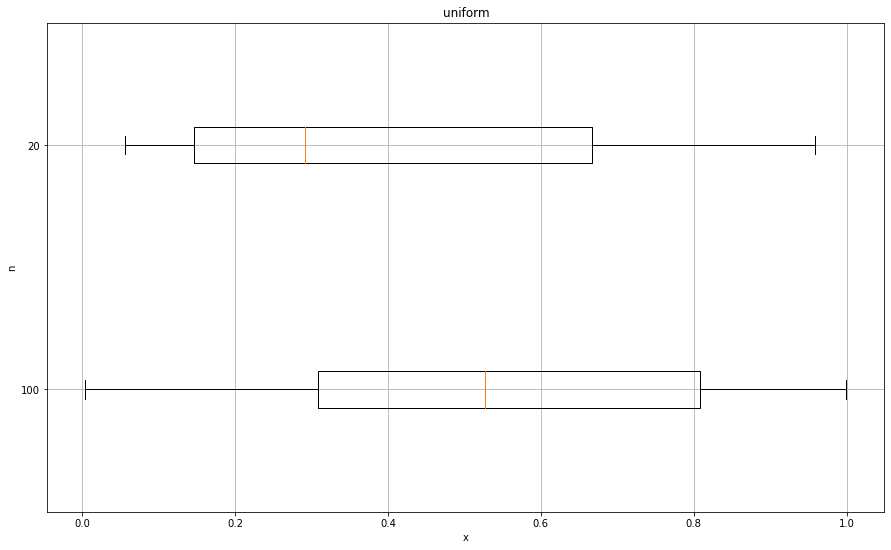

In [9]:
# Равномерное распределение
Plot(st.uniform,[100,20],"uniform")

In [10]:
def toProbability(array):
    ln = [0 for i in range(len(set(array)))]
    index = 0
    i = 0
    while True:
        ln[index] += 1
        if(i == len(array) - 1):
            break
        i += 1
        if(array[i] != array[i - 1]):
            index += 1
    for i in range(len(ln)):
        ln[i] = ln[i]/len(ln)
    return ln

In [11]:
def EmissionsProbability(func, size,title,mu = 0,notnull=True):
    while True:
        array = getSortArray(func,size,mu)
        probability = toProbability(array)
        array = sorted(list(set(array)))
        Q1 = cvart(0.25,array)
        Q3 = cvart(0.75,array)
        X1 = Q1 - 1.5*(Q3 - Q1)
        X2 = Q3 + 1.5*(Q3 - Q1)
        X1t = 0
        X2t = 0
        sm = 0
        for i in range(len(array)):
            if array[i] < X1:
                X1t += probability[i]
            if array[i] >= X2:
                X2t += probability[i]
        if X1t + X2t != 0 or not notnull:
            break
    print(title + " n =  " + str(size) + " : " + str(X1t + X2t))
    return X1t + X2t

In [12]:
def Teoretical(func,mu=0):
    if(func == st.poisson):
        Q1 = func.ppf(0.25,mu=mu)
    else:
        Q1 = func.ppf(0.25)
    print(f"Q1 (teoretical) = : {Q1:.3f}")
    if(func == st.poisson):
        Q3 = func.ppf(0.75,mu=mu)
    else:
        Q3 = func.ppf(0.75)
    print(f"Q3 (teoretical) = : {Q3:.3f}")
    X1 = Q1 - 1.5*(Q3 - Q1)
    X2 = Q3 + 1.5*(Q3 - Q1)
    print(f"X1 (teoretical) = : {X1:.3f}")
    print(f"X2 (teoretical) = : {X2:.3f}")
    
    if(func == st.poisson):
        FX1 = func.cdf(X1,mu=mu)
        FX2 = func.cdf(X2,mu=mu)
        print(f"Pt (teoretical) = : {FX1 + (1 - FX2) - func.pmf(int(X1),mu=mu):.3f}")
    else:
        FX1 = func.cdf(X1)
        FX2 = func.cdf(X2)
        print(f"Pt (teoretical) = : {FX1 + (1 - FX2):.3f}")

In [13]:
def TeoreticalAndPrecticalEmissions(func,size,title,mu=0,notnull=True):
    print(title)
    Teoretical(func,mu)
    for i in size:
        EmissionsProbability(func,i,title,mu,notnull=notnull)
    

In [14]:
# Доля выбросов Ptв для нормального распределения
TeoreticalAndPrecticalEmissions(st.norm,[20,100],"norm")

norm
Q1 (teoretical) = : -0.674
Q3 (teoretical) = : 0.674
X1 (teoretical) = : -2.698
X2 (teoretical) = : 2.698
Pt (teoretical) = : 0.007
norm n =  20 : 0.1
norm n =  100 : 0.03


In [15]:
# Доля выбросов для распределения Коши
TeoreticalAndPrecticalEmissions(st.cauchy,[20,100],"caushy")

caushy
Q1 (teoretical) = : -1.000
Q3 (teoretical) = : 1.000
X1 (teoretical) = : -4.000
X2 (teoretical) = : 4.000
Pt (teoretical) = : 0.156
caushy n =  20 : 0.05
caushy n =  100 : 0.15000000000000002


In [16]:
# Доля выбросов для распределения Лапласа
TeoreticalAndPrecticalEmissions(st.laplace,[20,100],"laplace")

laplace
Q1 (teoretical) = : -0.693
Q3 (teoretical) = : 0.693
X1 (teoretical) = : -2.773
X2 (teoretical) = : 2.773
Pt (teoretical) = : 0.062
laplace n =  20 : 0.05
laplace n =  100 : 0.06


In [17]:
# Доля выбросов для распределения пуассона 
TeoreticalAndPrecticalEmissions(st.poisson,[20,100],"pois",mu=10)

pois
Q1 (teoretical) = : 8.000
Q3 (teoretical) = : 12.000
X1 (teoretical) = : 2.000
X2 (teoretical) = : 18.000
Pt (teoretical) = : 0.008
pois n =  20 : 0.1
pois n =  100 : 0.07692307692307693


In [18]:
# Доля выбросов для равномерного распределения
TeoreticalAndPrecticalEmissions(st.uniform,[20,100],"unif",notnull=False) 

unif
Q1 (teoretical) = : 0.250
Q3 (teoretical) = : 0.750
X1 (teoretical) = : -0.500
X2 (teoretical) = : 1.500
Pt (teoretical) = : 0.000
unif n =  20 : 0
unif n =  100 : 0
